## Decision Tree Regressor

In [1]:
import pandas as pd
df=pd.read_csv('overfit_data.csv')
df.head()

,X,y
0,0.002259,0.516555
1,0.003288,1.049377
2,0.005909,0.696379
3,0.008003,0.964669
4,0.010438,1.340802


## 데이터 확인

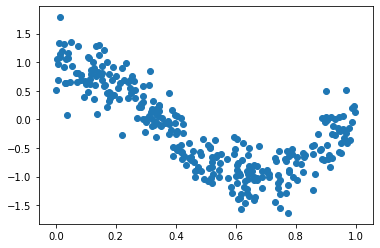

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'])

In [5]:
X=df['X'].values.reshape(-1,1)
y=df['y']

## Decision Tree 모듈 불러오기

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor_3=DecisionTreeRegressor(random_state=42,max_depth=3)
regressor_3.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [18]:
y_hat_3=regressor_3.predict(X)

## 예측값 그래프로 확인

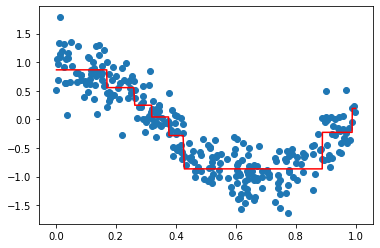

In [19]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat_3,color='r')

In [25]:
regressor_6=DecisionTreeRegressor(random_state=42,max_depth=6)
regressor_6.fit(X,y)
y_hat_6=regressor.predict(X)

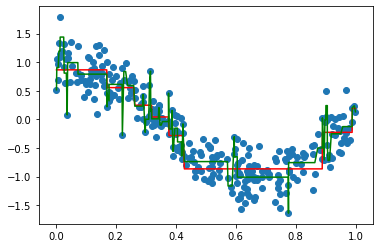

In [27]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_hat_3,color='r')
plt.plot(X,y_hat_6,color='g')

## Cross validation 성능확인

In [23]:
from sklearn.model_selection import KFold,cross_validate
kfold=KFold(n_splits=5)
cross_validate(regressor_3,X,y,cv=kfold)

{'fit_time': array([0.00098538, 0.00098872, 0.        , 0.00099683, 0.00099874]),
 'score_time': array([0.00100613, 0.00099945, 0.0009954 , 0.        , 0.        ]),
 'test_score': array([-1.47523815, -0.50490165, -1.06375759, -0.90151443, -2.09958171])}

In [24]:
cross_validate(regressor_6,X,y,cv=kfold)

{'fit_time': array([0.00099754, 0.00102878, 0.        , 0.00099015, 0.0009973 ]),
 'score_time': array([0.00099826, 0.        , 0.00099802, 0.        , 0.        ]),
 'test_score': array([-1.22718537, -0.35355585, -1.0768786 , -0.46700178, -1.8670406 ])}

* regression모형과 성능비교하기

## (야구데이터) 데이터 불러오기

In [28]:
import pandas as pd
df=pd.read_csv('Hitters_simple.csv')
df=df.dropna()
df.head()

,Hits,HmRun,Runs,RBI,Walks,Years,Salary
1,81,7,24,38,39,14,475.0
2,130,18,66,72,76,3,480.0
3,141,20,65,78,37,11,500.0
4,87,10,39,42,30,2,91.5
5,169,4,74,51,35,11,750.0


In [29]:
features=['Hits','HmRun','Runs','RBI','Walks','Years']
X=df[features]
y=df['Salary']

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42, max_depth=3)

In [31]:
dtr.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

## 시각화

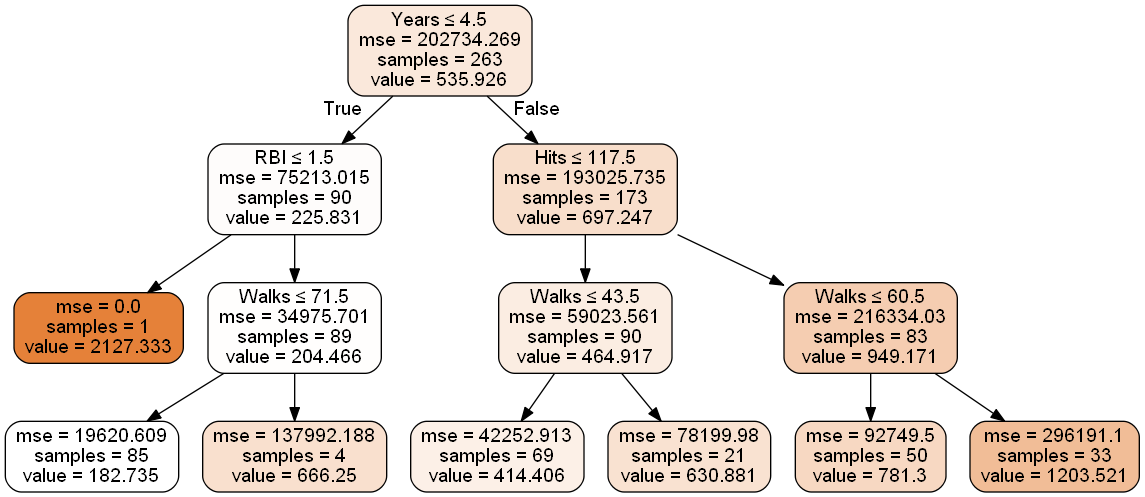

In [33]:
from graph import graph
graph(dtr,X,y)

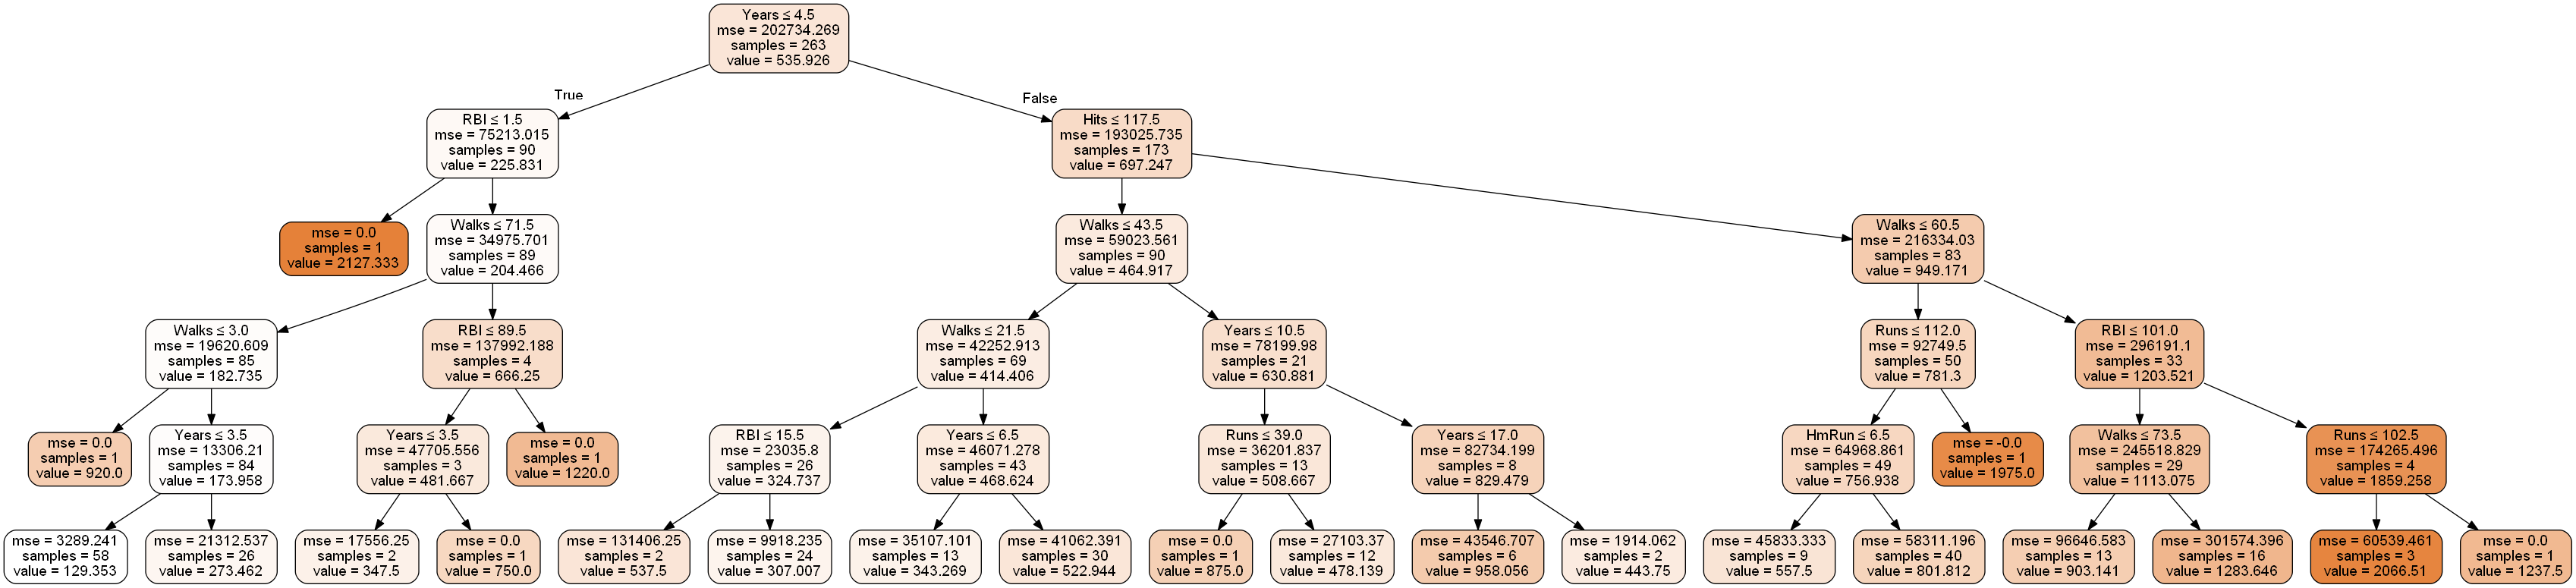

In [35]:
dtr=DecisionTreeRegressor(random_state=42, max_depth=5)
graph(dtr,X,y)

## Classification

In [36]:
import pandas as pd
df=pd.read_csv('Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [37]:
categorical=['ChestPain','Thal','AHD']
df=df.dropna()
df=pd.get_dummies(df,columns=categorical,drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [38]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

clf=DecisionTreeClassifier()
kfold=KFold(n_splits=5)
cross_validate(clf,X,y,cv=kfold)

{'fit_time': array([0.0039897 , 0.00199461, 0.00399661, 0.00498676, 0.00299168]),
 'score_time': array([0.00099754, 0.00199509, 0.00098968, 0.00099802, 0.00099635]),
 'test_score': array([0.73333333, 0.76666667, 0.71186441, 0.71186441, 0.69491525])}

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cross_validate(clf,X,y,cv=kfold)

{'fit_time': array([0.00299239, 0.00399041, 0.00298905, 0.00295591, 0.00401807]),
 'score_time': array([0.00202417, 0.00103426, 0.        , 0.00199652, 0.        ]),
 'test_score': array([0.73333333, 0.78333333, 0.71186441, 0.72881356, 0.71186441])}

## Hyper parmater tuning

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [47]:
grid_search.fit(X,y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.6min finished
C:\Users\ralbu\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [50]:
grid_search.best_estimator_
cross_validate(grid_search.best_estimator_,X,y,cv=kfold)

{'fit_time': array([0.0708456 , 0.05884743, 0.05086088, 0.04987288, 0.05191183]),
 'score_time': array([0.0059855 , 0.00498605, 0.00494361, 0.0059855 , 0.00597906]),
 'test_score': array([0.75      , 0.93333333, 0.76271186, 0.79661017, 0.74576271])}